# IMPLEMTASI FUZZY TSUKAMOTO KOPI GAYO PADA JUPYTER PYTHON

Implementasi metode Fuzzy Logic Tsukamoto pada harga Kopi Gayo Arabika Specialty dengan input yang di dapatkan Kemasan dan Proses untuk menentukan harga berdasarkan 4 Rules.

In [1]:
#IMPORT
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

a. Rata – rata (avarage)

     Ukuran kemasan paling kecil 100 gram dan paling besar 1000gram
     Proses pembuatan paling cepat 1 hari dan paling lambat 10 hari
     Untuk harga yang murah 30.000 dan paling mahal 30.000

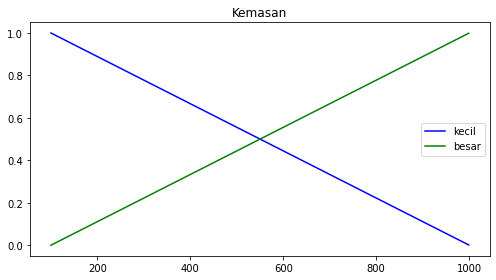

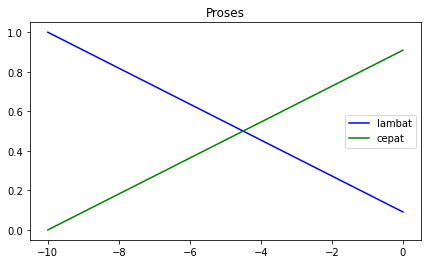

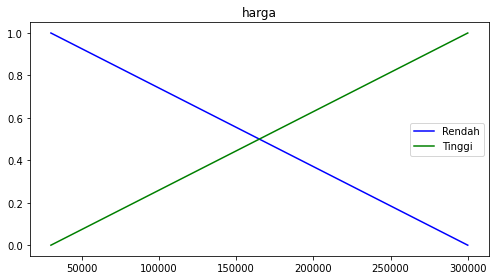

In [3]:
#Grafik 

#grafik kemasan
kemasan = 400
x_kemasan = np.arange(100, 1000, 1)

kemasan_kc = fuzz.trapmf(x_kemasan, [100, 100, 100, 1000])
kemasan_bs = fuzz.trapmf(x_kemasan, [100, 1000, 1000, 1000])

fig, ax = plt.subplots(nrows=1, figsize=(7, 4))

ax.plot(x_kemasan, kemasan_kc, 'b', linewidth=1.5, label='kecil')
ax.plot(x_kemasan, kemasan_bs, 'g', linewidth=1.5, label='besar')

ax.set_title('Kemasan')
ax.legend()

plt.tight_layout()

#grafik proses

x_proses = np.arange(-10, 1, 1)

proses_lb = fuzz.trapmf(x_proses, [-10, -10, -10, 1])
proses_cp = fuzz.trapmf(x_proses, [-10, 1, 1, 1])

fig, ax = plt.subplots(nrows=1, figsize=(7, 4))

ax.plot(x_proses, proses_lb, 'b', linewidth=1.5, label='lambat')
ax.plot(x_proses, proses_cp, 'g', linewidth=1.5, label='cepat')

ax.set_title('Proses')
ax.legend()

plt.tight_layout

#grafik harga

x_harga = np.arange(30000, 300000, 1)

harga_rd = fuzz.trapmf(x_harga, [30000, 30000, 30000, 300000])
harga_tg = fuzz.trapmf(x_harga, [30000, 300000, 300000, 300000])

fig, ax = plt.subplots(nrows=1, figsize=(7, 4))

ax.plot(x_harga, harga_rd, 'b', linewidth=1.5, label='Rendah')
ax.plot(x_harga, harga_tg, 'g', linewidth=1.5, label='Tinggi')

ax.set_title('harga')
ax.legend()

plt.tight_layout()

In [9]:
#fuzzyfikasi
#membuat rumus

def turun(b,a,x):
    if(x<=a):
        nilai = 1
    elif(x>a and x<b):
        nilai = (b-x)/(b-a)
    elif(x>=b):
        nilai = 0

    return nilai

def naik(b,a,x):
    if(x<=a):
        nilai = 0
    elif(x>a and x<b):
        nilai = (x-a)/(b-a)
    elif(x>=b):
        nilai = 1

    return nilai

def agregasi_turun(b,a,alfa):
    nilai = b - (alfa*(b-a))
    return nilai

def agregasi_naik(b,a,alfa):
    nilai = alfa*(b-a) + a
    return nilai

#input jumlah dan nama variabel
var = int(input("Jumlah variabel: "))

nama_var = []
for i in range(var):
    nama = input("Sebutkan nama variabel: ")
    nama_var.append(nama)

Jumlah variabel: 3
Sebutkan nama variabel: kemasan
Sebutkan nama variabel: proses
Sebutkan nama variabel: harga


In [20]:
#input nilai tertinggi dan terendah
variabel = dict()
for i in nama_var:
    print(i)
    up = int(input("naik : "))
    down = int(input("turun : "))
    variabel.update({i+"_naik":up})
    variabel.update({i+"_turun":down})
    
print(variabel)

kemasan
naik : 1000
turun : 100
proses
naik : 1
turun : -10
harga
naik : 300000
turun : 30000
{'kemasan_naik': 1000, 'kemasan_turun': 100, 'proses_naik': 1, 'proses_turun': -10, 'harga_naik': 300000, 'harga_turun': 30000}


In [16]:
#input soal

soal = dict()

jml = int(input("Jumlah variabel yang diketahui : "))

for i in range(jml):
    ver = input("Nama variabel : ")
    val = int(input("Nilai : "))   
    soal.update({ver:val})
    
print(soal)

dit = input("Variabel yang ditanyakan : ")

Jumlah variabel yang diketahui : 2
Nama variabel : kemasan
Nilai : 400
Nama variabel : proses
Nilai : -6
{'kemasan': 400, 'proses': -6}
Variabel yang ditanyakan : harga


In [21]:
#menghitung fuzzyfikasi
nk = dict()
for i in soal:
    up = naik(variabel[i+"_naik"],variabel[i+"_turun"],soal[i])
    down = turun(variabel[i+"_naik"],variabel[i+"_turun"],soal[i])
    nk.update({i+"_naik":up})
    nk.update({i+"_turun":down})

print(nk)

{'kemasan_naik': 0.3333333333333333, 'kemasan_turun': 0.6666666666666666, 'proses_naik': 0.36363636363636365, 'proses_turun': 0.6363636363636364}


In [24]:
#menghitung rules
alfa = []
z = []

r = int(input("Masukkan jumlah peraturan : "))

for i in range(r):
    kondisi1 = input("Kondisi 1(naik/turun): ")
    kondisi2 = input("Kondisi 2(naik/turun): ")
    kesimpulan = input("Kesimpulan(naik/turun): ")
    #Fire Strength INTERSEKSI (AND)
    a = min(nk[kondisi1],nk[kondisi2]) 
    alfa.append(a)
    if(kesimpulan == "turun"):
        zz = agregasi_turun(variabel[dit+"_naik"],variabel[dit+"_turun"],a)
    elif(kesimpulan == "naik"):
        zz = agregasi_naik(variabel[dit+"_naik"],variabel[dit+"_turun"],a)        
    z.append(zz)

Masukkan jumlah peraturan : 4
Kondisi 1(naik/turun): kemasan_naik
Kondisi 2(naik/turun): proses_turun
Kesimpulan(naik/turun): naik
Kondisi 1(naik/turun): kemasan_naik
Kondisi 2(naik/turun): proses_turun
Kesimpulan(naik/turun): naik
Kondisi 1(naik/turun): kemasan_turun
Kondisi 2(naik/turun): proses_turun
Kesimpulan(naik/turun): turun
Kondisi 1(naik/turun): kemasan_turun
Kondisi 2(naik/turun): proses_naik
Kesimpulan(naik/turun): turun


In [25]:
#predikat
print(alfa)

#hasil hitungan
print(z)

[0.3333333333333333, 0.3333333333333333, 0.6363636363636364, 0.36363636363636365]
[120000.0, 120000.0, 128181.81818181818, 201818.18181818182]


In [26]:
#DEFUZIFIKASI
df = 0

for i in range(len(alfa)):
    df += alfa[i]*z[i]

defuz = int(df/sum(alfa))

print("Jadi, nilai ",dit," adalah ",defuz)

Jadi, nilai  harga  adalah  140975
